In [1]:
import matplotlib.pyplot as plt
from nilearn import datasets
import pandas as pd

In [2]:
data = datasets.fetch_abide_pcp(
    data_dir='/bigdata/yanting/datasets/nilearn_data',
    pipeline='cpac',
    band_pass_filtering=True,
    global_signal_regression=False,
    derivatives=['func_preproc', 'rois_cc200'],
    verbose=0
)

In [3]:
data.keys()

dict_keys(['description', 'phenotypic', 'func_preproc', 'rois_cc200'])

In [4]:
df: pd.DataFrame = data['phenotypic']
print('Number of subjects:', df.shape[0])
print()
print(df['DX_GROUP'].unique())
print('Number of patients:', (df['DX_GROUP'] == 1).sum())
print('Number of health controls:', (df['DX_GROUP'] == 2).sum())
print()
print(df['SEX'].unique())
print('Number of males:', (df['SEX'] == 1).sum())
print('Number of females:', (df['SEX'] == 2).sum())

Number of subjects: 871

[1 2]
Number of patients: 403
Number of health controls: 468

[1 2]
Number of males: 727
Number of females: 144


In [5]:
for column in df.columns:
    print(column)

i
Unnamed: 0
SUB_ID
X
subject
SITE_ID
FILE_ID
DX_GROUP
DSM_IV_TR
AGE_AT_SCAN
SEX
HANDEDNESS_CATEGORY
HANDEDNESS_SCORES
FIQ
VIQ
PIQ
FIQ_TEST_TYPE
VIQ_TEST_TYPE
PIQ_TEST_TYPE
ADI_R_SOCIAL_TOTAL_A
ADI_R_VERBAL_TOTAL_BV
ADI_RRB_TOTAL_C
ADI_R_ONSET_TOTAL_D
ADI_R_RSRCH_RELIABLE
ADOS_MODULE
ADOS_TOTAL
ADOS_COMM
ADOS_SOCIAL
ADOS_STEREO_BEHAV
ADOS_RSRCH_RELIABLE
ADOS_GOTHAM_SOCAFFECT
ADOS_GOTHAM_RRB
ADOS_GOTHAM_TOTAL
ADOS_GOTHAM_SEVERITY
SRS_VERSION
SRS_RAW_TOTAL
SRS_AWARENESS
SRS_COGNITION
SRS_COMMUNICATION
SRS_MOTIVATION
SRS_MANNERISMS
SCQ_TOTAL
AQ_TOTAL
COMORBIDITY
CURRENT_MED_STATUS
MEDICATION_NAME
OFF_STIMULANTS_AT_SCAN
VINELAND_RECEPTIVE_V_SCALED
VINELAND_EXPRESSIVE_V_SCALED
VINELAND_WRITTEN_V_SCALED
VINELAND_COMMUNICATION_STANDARD
VINELAND_PERSONAL_V_SCALED
VINELAND_DOMESTIC_V_SCALED
VINELAND_COMMUNITY_V_SCALED
VINELAND_DAILYLVNG_STANDARD
VINELAND_INTERPERSONAL_V_SCALED
VINELAND_PLAY_V_SCALED
VINELAND_COPING_V_SCALED
VINELAND_SOCIAL_STANDARD
VINELAND_SUM_SCORES
VINELAND_ABC_STANDARD
VINE

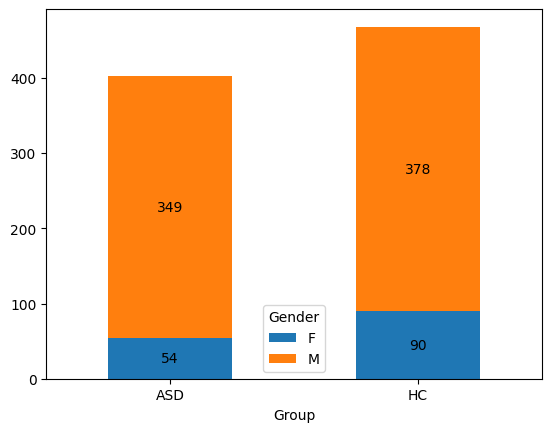

In [6]:
_df = df[['DX_GROUP', 'SEX']]
_df = _df.rename(columns={'DX_GROUP': 'Group', 'SEX': 'Gender'})
_df['Group'] = _df['Group'].map({1: 'ASD', 2: 'HC'})
_df['Gender'] = _df['Gender'].map({1: 'M', 2: 'F'})
_df = _df.reset_index().groupby(['Group', 'Gender']).count().unstack('Gender')
_df = _df.droplevel(0, axis=1)
_df.plot(kind='bar', stacked=True)

ax: plt.Axes = plt.gca()
ax.tick_params(axis='x', rotation=0)
for p in ax.patches:
    v = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    ax.annotate(str(v), (x, y), va='center', ha='center')

array([<Axes: title={'center': 'ASD'}, ylabel='Frequency'>,
       <Axes: title={'center': 'HC'}, ylabel='Frequency'>], dtype=object)

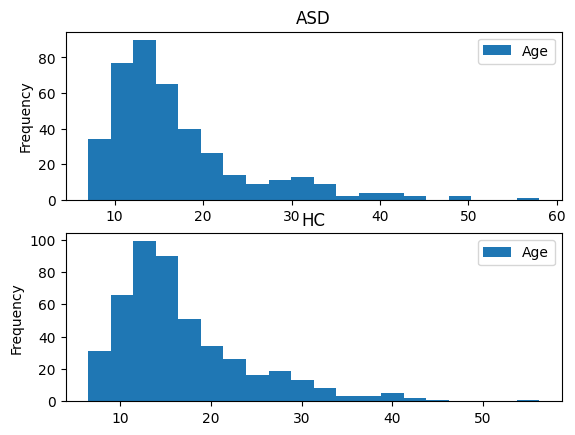

In [7]:
_df = df[['DX_GROUP', 'AGE_AT_SCAN']]
_df = _df.rename(columns={'DX_GROUP': 'Group', 'AGE_AT_SCAN': 'Age'})
_df['Group'] = _df['Group'].map({1: 'ASD', 2: 'HC'})
_df.plot(kind='hist', by='Group', bins=20)

<Axes: xlabel='SITE_ID'>

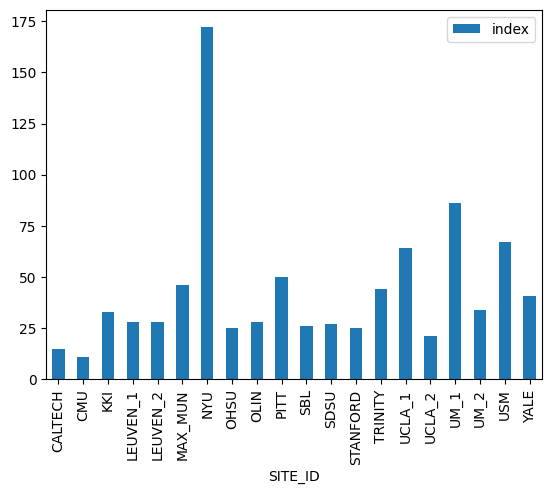

In [8]:
df[['SITE_ID']].reset_index().groupby('SITE_ID').count().plot(kind='bar')